## Importação de Bibliotecas

In [319]:
# Bibliotecas:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import itertools

# Balanceamento
from imblearn.over_sampling import SMOTE, ADASYN

# Redução
from sklearn.decomposition import PCA

# Normalização
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

# Cluster (agrupamento)
from scipy.spatial.distance import cdist 
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.metrics.cluster import homogeneity_score
from sklearn.metrics import silhouette_score
from sklearn.metrics import silhouette_samples

# Classificação
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate, cross_val_predict

    # Árvore de decisão
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

    # KNN
from sklearn.neighbors import KNeighborsClassifier

    # SVM
from sklearn.svm import SVC

    # Rede neural (MLP)
from sklearn.neural_network import MLPClassifier

# Seleção e pré-processamento de dados:

* **Base de dados**: ["Loan Data Set"](https://www.kaggle.com/datasets/mirzahasnine/loan-data-set?resource=download);
* **Problema a ser investigado**: Aprovação ou não aprovação de empréstimo para pessoas de acordo com seus dados;
* **Número de amostras**: 614;
* **Número de atributos**: 12;
* **Tipos de atributos**: Categóricos e numéricos;
* **Valores ausentes**: Sim.

### Limpeza de dados

* Leitura da base de dados

In [303]:
def ShowInformationDataFrame(df, message=""):
    print(message+"\n")
    # Imprime as 10 primeiras linhas do arquivo
    print("PRIMEIRAS 10 LINHAS\n")
    print(df.head(10))
    print("\n")
    # Imprime informações sobre os dados
    print("INFORMAÇÕES GERAIS DOS DADOS\n")
    print(df.info())
    print("\n")
    # Imprime uma analise descritiva sobre os dados
    print("DESCRIÇÃO DOS DADOS\n")
    print(df.describe())
    print("\n")
    # Imprime a quantidade de valores faltantes por coluna
    print("VALORES FALTANTES\n")
    print(df.isnull().sum())
    print("\n") 

In [304]:
input_file = './0-Datasets/loan_train.csv'
names = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Applicant_Income', 'Coapplicant_Income', 'Loan_Amount', 'Term','Credit_History', 'Area', 'Status']
columns = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Applicant_Income', 'Coapplicant_Income', 'Loan_Amount', 'Term','Credit_History', 'Area', 'Status']
features = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Applicant_Income', 'Coapplicant_Income', 'Loan_Amount', 'Term','Credit_History', 'Area']
# columns = ['Self_Employed', 'Applicant_Income', 'Coapplicant_Income', 'Loan_Amount', 'Term','Credit_History', 'Status']
# features = ['Self_Employed', 'Applicant_Income', 'Coapplicant_Income', 'Loan_Amount', 'Term','Credit_History']
target = 'Status'
df = pd.read_csv(input_file,        # Nome do arquivo com dados
                names = names,      # Nome das colunas 
                usecols = columns, # Define as colunas que serão  utilizadas
                na_values='')       # Define que ? será considerado valores ausentes

ShowInformationDataFrame(df, "DataFrame")

DataFrame

PRIMEIRAS 10 LINHAS

  Gender Married Dependents     Education Self_Employed  Applicant_Income  \
0   Male      No          0  Not Graduate            No            604500   
1   Male      No          0      Graduate            No            584900   
2   Male     Yes          1      Graduate            No            458300   
3   Male     Yes          0      Graduate           Yes            300000   
4   Male     Yes          0  Not Graduate            No            258300   
5   Male      No          0      Graduate            No            600000   
6   Male     Yes          2      Graduate           Yes            541700   
7   Male     Yes          0  Not Graduate            No            233300   
8   Male     Yes         3+      Graduate            No            303600   
9   Male     Yes          2      Graduate            No            400600   

   Coapplicant_Income  Loan_Amount   Term  Credit_History       Area Status  
0                 0.0     11500000  360.0 

* Tratamento dos valores faltantes
  * método de DELETAR os objetos que possuem valores faltantes

In [305]:
def UpdateMissingValues(df, column, method="mode", number=0):
    if method == 'number':
        # Substituindo valores ausentes por um número
        df[column].fillna(number, inplace=True)
    elif method == 'median':
        # Substituindo valores ausentes pela mediana 
        median = df[column].median()
        df[column].fillna(median, inplace=True)
    elif method == 'mean':
        # Substituindo valores ausentes pela média
        mean = df[column].mean()
        df[column].fillna(mean, inplace=True)
    elif method == 'mode':
        # Substituindo valores ausentes pela moda
        mode = df[column].mode()[0]
        df[column].fillna(mode, inplace=True)
    elif method == 'delete':
        df.dropna(axis=0, how='any', subset=column, inplace=True)

columns_missing_value = df.columns[df.isnull().any()]
print(columns_missing_value)
method = 'delete' # number or median or mean or mode
    
for c in columns_missing_value:
    UpdateMissingValues(df, c, method)
    
ShowInformationDataFrame(df,"Dataframe UpdateMissingValues")

Index(['Gender', 'Married', 'Dependents', 'Self_Employed', 'Term',
       'Credit_History'],
      dtype='object')
Dataframe UpdateMissingValues

PRIMEIRAS 10 LINHAS

  Gender Married Dependents     Education Self_Employed  Applicant_Income  \
0   Male      No          0  Not Graduate            No            604500   
1   Male      No          0      Graduate            No            584900   
2   Male     Yes          1      Graduate            No            458300   
3   Male     Yes          0      Graduate           Yes            300000   
4   Male     Yes          0  Not Graduate            No            258300   
5   Male      No          0      Graduate            No            600000   
6   Male     Yes          2      Graduate           Yes            541700   
7   Male     Yes          0  Not Graduate            No            233300   
8   Male     Yes         3+      Graduate            No            303600   
9   Male     Yes          2      Graduate            No        

* Conversão dos atributos categóricos para numéricos

In [306]:
# Converte os atributos categóricos para numéricos
    # get all categorical columns
cat_columns = df.select_dtypes(['object']).columns

    # convert all categorical columns to numeric
df[cat_columns] = df[cat_columns].apply(lambda x: pd.factorize(x)[0])

ShowInformationDataFrame(df,"Dataframe numérico")

Dataframe numérico

PRIMEIRAS 10 LINHAS

   Gender  Married  Dependents  Education  Self_Employed  Applicant_Income  \
0       0        0           0          0              0            604500   
1       0        0           0          1              0            584900   
2       0        1           1          1              0            458300   
3       0        1           0          1              1            300000   
4       0        1           0          0              0            258300   
5       0        0           0          1              0            600000   
6       0        1           2          1              1            541700   
7       0        1           0          0              0            233300   
8       0        1           3          1              0            303600   
9       0        1           2          1              0            400600   

   Coapplicant_Income  Loan_Amount   Term  Credit_History  Area  Status  
0                 0.0     

### Balanceamento de dados

A base se apresentou desbalanceada, dessa forma, foi necessário utilizar uma técnica de balanceamento.

* Técnicas de Oversample:
  * SMOTE (utilizada)
  * ADASYN

Base default
 1    341
0    158
Name: Status, dtype: int64
Base balanceada
 0    341
1    341
Name: Status, dtype: int64


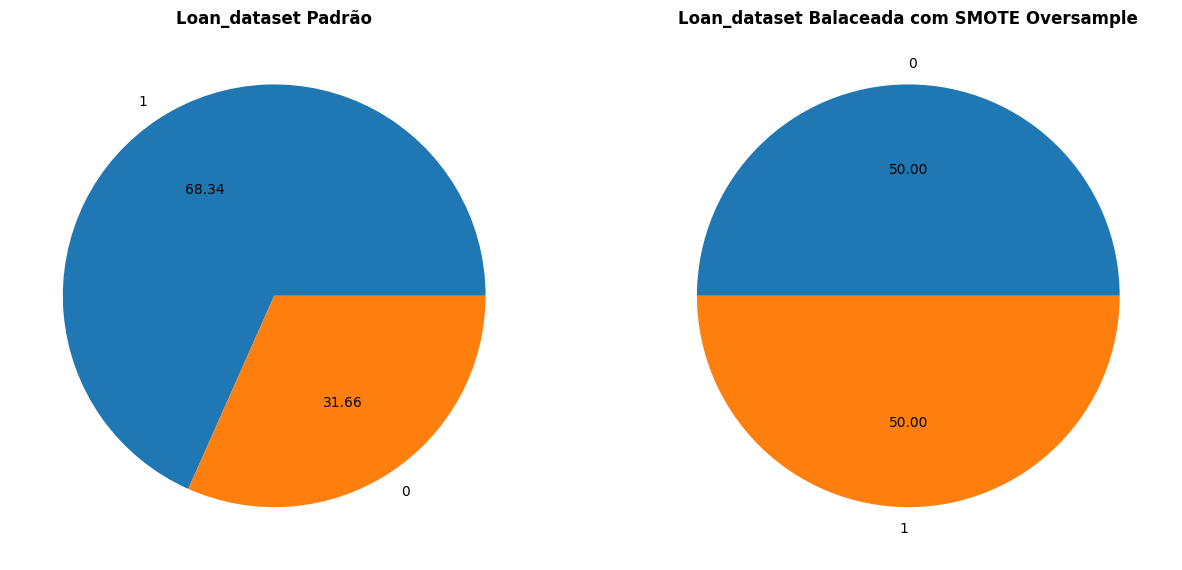

In [307]:
x = df.drop(['Status'], axis=1)
y = df['Status']

# Synthetic Minority Oversampling Technique (SMOTE)
x_os, y_os = SMOTE().fit_resample(x, y)
# Adaptive Synthetic (ADASYN) sampling method
# x_os, y_os = ADASYN().fit_resample(x, y)

print('Base default\n',y.value_counts())
print('Base balanceada\n',y_os.value_counts())

fig, ax = plt.subplots(1, 2, figsize=(15, 10))

y.value_counts().plot.pie(ax=ax[0], autopct='%.2f')
y_os.value_counts().plot.pie(ax=ax[1], autopct='%.2f')

plt.subplots_adjust(hspace = 1)

for n in np.arange(0,2):
    ax[n].set_ylabel('')
    
ax[0].set_title('Loan_dataset Padrão', fontweight='bold')
ax[1].set_title('Loan_dataset Balaceada com SMOTE Oversample', fontweight='bold')

plt.show()

---
# Normalização e redução de dados

### Normalização de dados
* Max-Min
* Z-Score

In [308]:
# Z-score normalization
x_zcore = StandardScaler().fit_transform(x_os)
normalized_zscore_Df = pd.DataFrame(data = x_zcore, columns = features)
normalized_zscore_Df = pd.concat([normalized_zscore_Df, y_os], axis = 1)
ShowInformationDataFrame(normalized_zscore_Df,"Dataframe Z-Score Normalized")

# Mix-Max normalization
x_minmax = MinMaxScaler().fit_transform(x_os)
normalized_minmax_Df = pd.DataFrame(data = x_minmax, columns = features)
normalized_minmax_Df = pd.concat([normalized_minmax_Df, y_os], axis = 1)
ShowInformationDataFrame(normalized_minmax_Df,"Dataframe Min-Max Normalized")

Dataframe Z-Score Normalized

PRIMEIRAS 10 LINHAS

     Gender   Married  Dependents  Education  Self_Employed  Applicant_Income  \
0 -0.394883 -1.162637   -0.745782  -1.669997      -0.348870          0.129008   
1 -0.394883 -1.162637   -0.745782   0.598804      -0.348870          0.093799   
2 -0.394883  0.860114    0.298619   0.598804      -0.348870         -0.133618   
3 -0.394883  0.860114   -0.745782   0.598804       2.866394         -0.417979   
4 -0.394883  0.860114   -0.745782  -1.669997      -0.348870         -0.492887   
5 -0.394883 -1.162637   -0.745782   0.598804      -0.348870          0.120924   
6 -0.394883  0.860114    1.343020   0.598804       2.866394          0.016197   
7 -0.394883  0.860114   -0.745782  -1.669997      -0.348870         -0.537795   
8 -0.394883  0.860114    2.387420   0.598804      -0.348870         -0.411512   
9 -0.394883  0.860114    1.343020   0.598804      -0.348870         -0.237267   

   Coapplicant_Income  Loan_Amount      Term  Credit_Hist

### Redução de dados (PCA)

Explained variance per component:
[0.16755136701008652, 0.1381213205908844, 0.11322594401185936, 0.10603065863797337, 0.08648848482307402, 0.08392686477436423, 0.08117759333392628, 0.06830658235758354, 0.06642913353847169, 0.05231206535362598, 0.03642998556815057]



Dataframe PCA

PRIMEIRAS 10 LINHAS

   principal component 1  principal component 2  Status
0              -1.481532              -0.500917       0
1              -0.560294               1.021933       1
2               0.526216              -0.464544       0
3               0.009437               0.180158       1
4              -0.587119              -0.996668       1
5              -0.605725               1.001287       1
6               2.659013               0.098343       1
7              -0.848950              -1.076547       1
8               1.315251              -1.217130       0
9               1.111513              -0.591909       1


INFORMAÇÕES GERAIS DOS DADOS

<class 'pandas.core.frame.DataFrame'>
RangeIndex

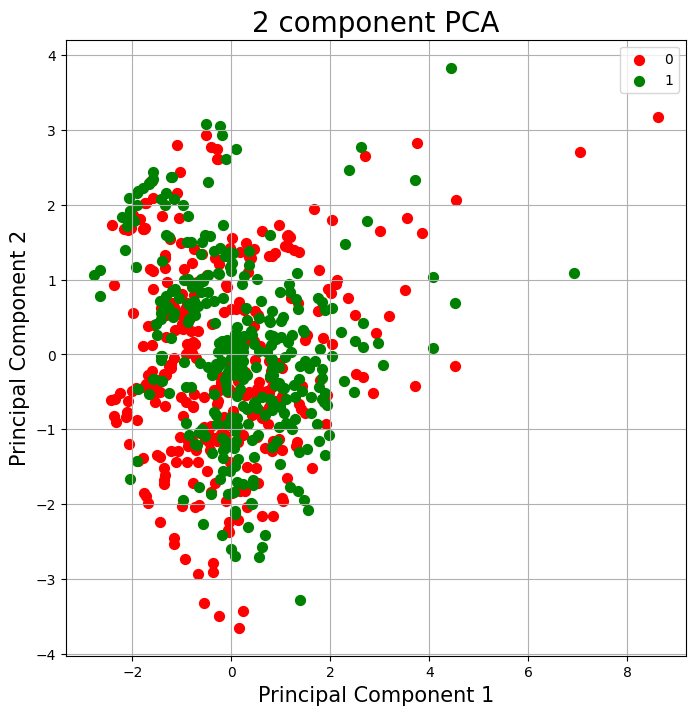

In [320]:
def VisualizePcaProjection(finalDf, targetColumn):
    fig = plt.figure(figsize = (8,8))
    ax = fig.add_subplot(1,1,1) 
    ax.set_xlabel('Principal Component 1', fontsize = 15)
    ax.set_ylabel('Principal Component 2', fontsize = 15)

    ax.set_title('2 component PCA', fontsize = 20)
    targets = [ 0, 1 ]
    colors = ['r', 'g']
    for target, color in zip(targets,colors):
        indicesToKeep = finalDf[targetColumn] == target
        ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1'],
                   finalDf.loc[indicesToKeep, 'principal component 2'],
                   c = color, s = 50)
    ax.legend(targets)
    ax.grid()
    plt.show()

# PCA projection
pca = PCA()
# utilizando a normalização Z-Score    
principalComponents = pca.fit_transform(x_zcore)
# utilizando a normalização Max-Min  
# principalComponents = pca.fit_transform(x_minmax)
print("Explained variance per component:")
print(pca.explained_variance_ratio_.tolist())
print("\n\n")

principalDf = pd.DataFrame(data = principalComponents[:,0:2], 
                            columns = ['principal component 1', 
                                        'principal component 2'])
finalDf = pd.concat([principalDf, y_os], axis = 1)    
ShowInformationDataFrame(finalDf,"Dataframe PCA")

VisualizePcaProjection(finalDf, target)

---
# Análise descritiva de dados
* Distribuição de frequência
* Visualização de dados (Histograma, Gráfico de setores, dispersão, etc)
* Medidas de resumo
  * Medidas de tendência central
  * Medidas de dispersão
  * Medidas de posição relativa
  * Medidas de associação

---
# Análise de grupos

In [310]:
def plot_samples(projected, labels, title):    
    fig = plt.figure()
    u_labels = np.unique(labels)
    for i in u_labels:
        plt.scatter(projected[labels == i , 0] , projected[labels == i , 1] , label = i,
                    edgecolor='none', alpha=0.5, cmap=plt.cm.get_cmap('tab10', 10))
    plt.xlabel('component 1')
    plt.ylabel('component 2')
    plt.legend()
    plt.title(title)
    plt.show()

### K-means
* Variar número de grupos (parâmetro k)

##### K-means Sklearn

c:\Users\lucas\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


573.9849693917092
For n_clusters = 2, silhouette score is 0.2562422090851481)
For n_clusters = 2, homogeinity score is 0.03505915153516862)


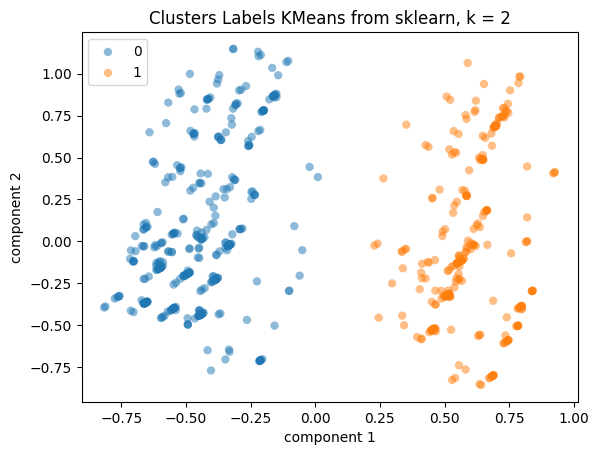

c:\Users\lucas\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


484.007329608609
For n_clusters = 3, silhouette score is 0.27081680783118656)
For n_clusters = 3, homogeinity score is 0.05039913927771109)


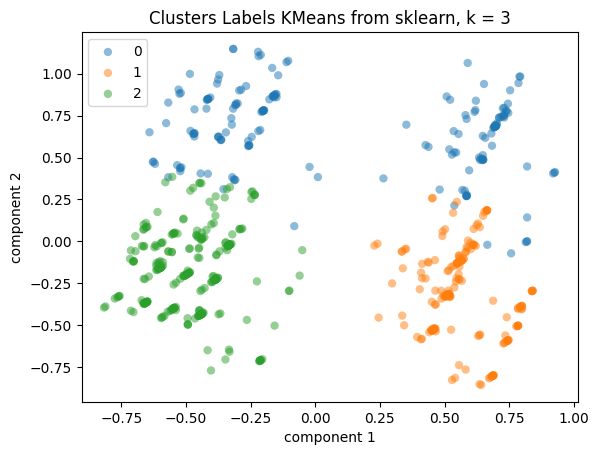

c:\Users\lucas\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


432.19600878099516
For n_clusters = 4, silhouette score is 0.27230785953360254)
For n_clusters = 4, homogeinity score is 0.061844285935787)


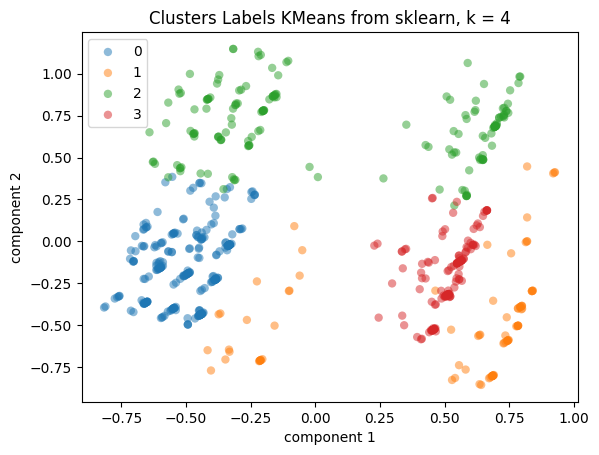

c:\Users\lucas\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


394.6400327434675
For n_clusters = 5, silhouette score is 0.2816149919020268)
For n_clusters = 5, homogeinity score is 0.1651709188916777)


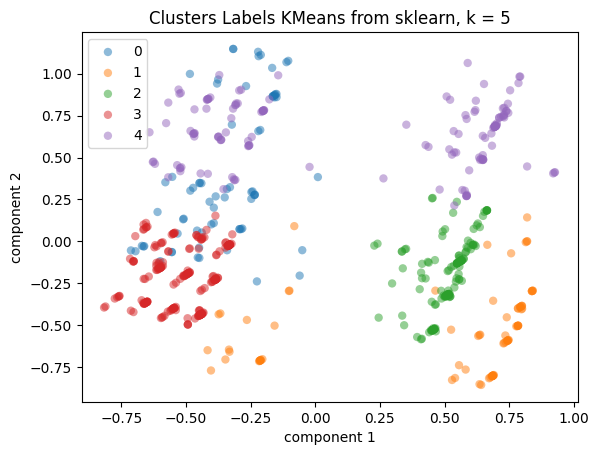

In [311]:
#Applying sklearn kmeans function
for k in range(2, 6):
    kmeans = KMeans(n_clusters=k).fit(principalComponents)
    print(kmeans.inertia_)
    centers = kmeans.cluster_centers_
    score = silhouette_score(principalComponents, kmeans.labels_)    
    print("For n_clusters = {}, silhouette score is {})".format(k, score))
    homogeneity = homogeneity_score(y_os.to_numpy(), kmeans.labels_)
    print("For n_clusters = {}, homogeinity score is {})".format(k, homogeneity))

    #Visualize the results sklearn
    plot_samples(principalComponents, kmeans.labels_, f'Clusters Labels KMeans from sklearn, k = {k}')

#### K-means implementado

For n_clusters = 2, silhouette score is 0.2562422090851481)
For n_clusters = 2, homogeinity score is 0.03505915153516862)


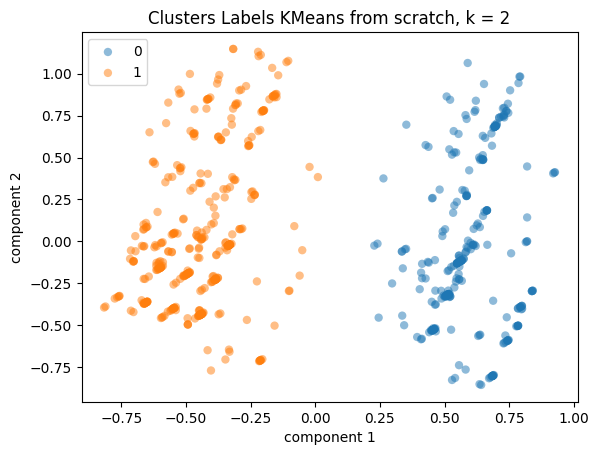

For n_clusters = 3, silhouette score is 0.24857499865132443)
For n_clusters = 3, homogeinity score is 0.0492379040066916)


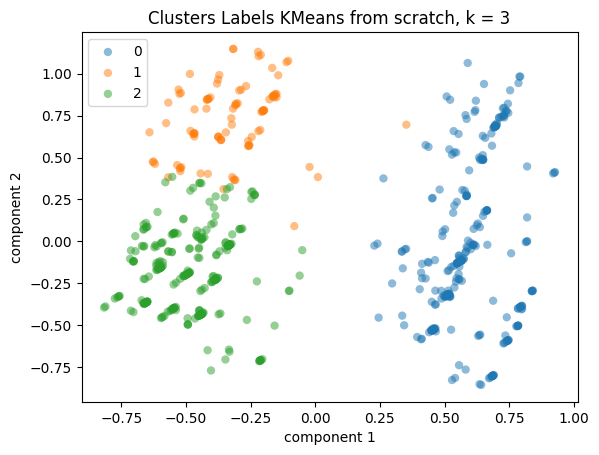

For n_clusters = 4, silhouette score is 0.273139583832852)
For n_clusters = 4, homogeinity score is 0.052134680994501616)


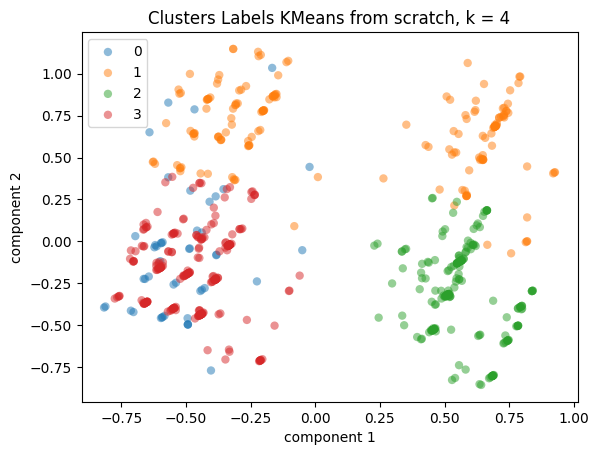

For n_clusters = 5, silhouette score is 0.27834080411061807)
For n_clusters = 5, homogeinity score is 0.061253947090454876)


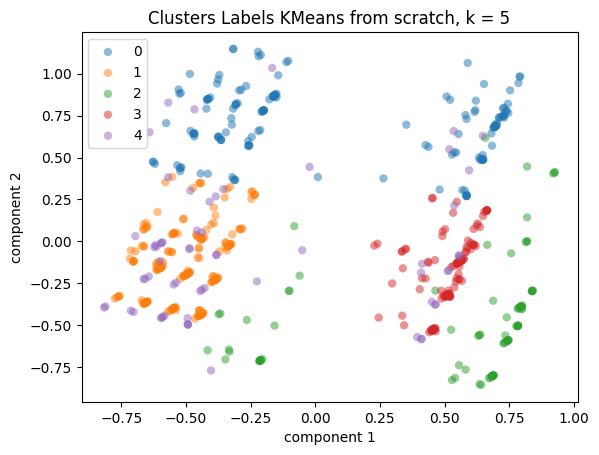

For n_clusters = 6, silhouette score is 0.23491776157572328)
For n_clusters = 6, homogeinity score is 0.12937892977805987)


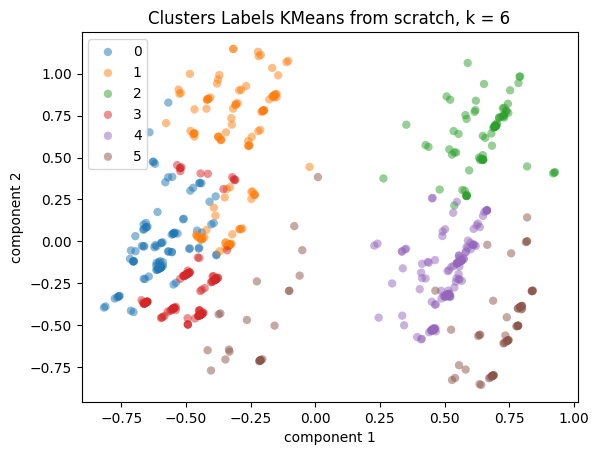

For n_clusters = 7, silhouette score is 0.233747555095774)
For n_clusters = 7, homogeinity score is 0.10062031570067093)


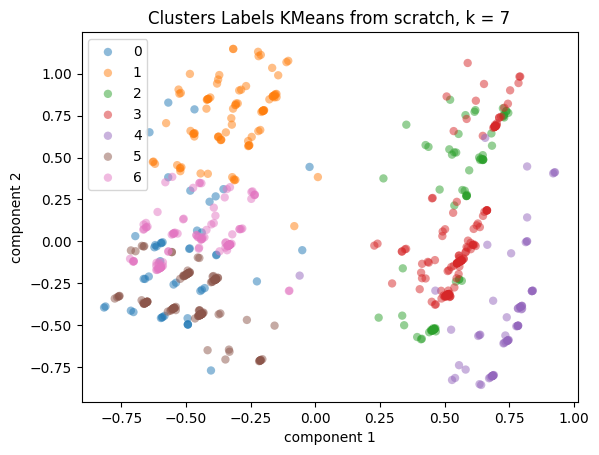

In [312]:
#Defining our kmeans function from scratch
def KMeans_scratch(x,k, no_of_iterations):
    idx = np.random.choice(len(x), k, replace=False)
    #Randomly choosing Centroids 
    centroids = x[idx, :] #Step 1
     
    #finding the distance between centroids and all the data points
    distance_type = ('euclidean', 'cityblock', 'minkowski', 'mahalanobis')
    dtype = 2
    distances = cdist(x, centroids ,distance_type[dtype]) #Step 2
    # Euclidean, Cityblock, Minkowski, Mahalanobis
     
    #Centroid with the minimum Distance
    points = np.array([np.argmin(i) for i in distances]) #Step 3
     
    #Repeating the above steps for a defined number of iterations
    #Step 4
    for _ in range(no_of_iterations): 
        centroids = []
        for idx in range(k):
            #Updating Centroids by taking mean of Cluster it belongs to
            temp_cent = x[points==idx].mean(axis=0) 
            centroids.append(temp_cent)
 
        centroids = np.vstack(centroids) #Updated Centroids 
         
        distances = cdist(x, centroids ,distance_type[dtype])
        points = np.array([np.argmin(i) for i in distances])
         
    return points

for k in range(2, 8):
    #Applying our kmeans function from scratch
    labels = KMeans_scratch(principalComponents,k,25)

    score = silhouette_score(principalComponents, labels)    
    print("For n_clusters = {}, silhouette score is {})".format(k, score))
    homogeneity = homogeneity_score(y_os.to_numpy(), labels)
    print("For n_clusters = {}, homogeinity score is {})".format(k, homogeneity))

    #Visualize the results 
    plot_samples(principalComponents, labels, f'Clusters Labels KMeans from scratch, k = {k}')

### GMM

[0.57478006 0.42521994]
[[-4.39321186e-01  3.54710531e-02  4.33917079e-03  1.15139882e-02
   8.59153713e-03  5.01949097e-02 -3.94941762e-02 -1.71757222e-04
  -7.22117386e-04 -1.25624603e-04  9.85082015e-06]
 [ 5.93841051e-01 -4.79470787e-02 -5.86536190e-03 -1.55637358e-02
  -1.16133881e-02 -6.78496710e-02  5.33852313e-02  2.32168382e-04
   9.76103500e-04  1.69809809e-04 -1.33155914e-05]]
For k = 2
Silhouette score is 0.2562422090851481
Homogeinity score is 0.03505915153516862


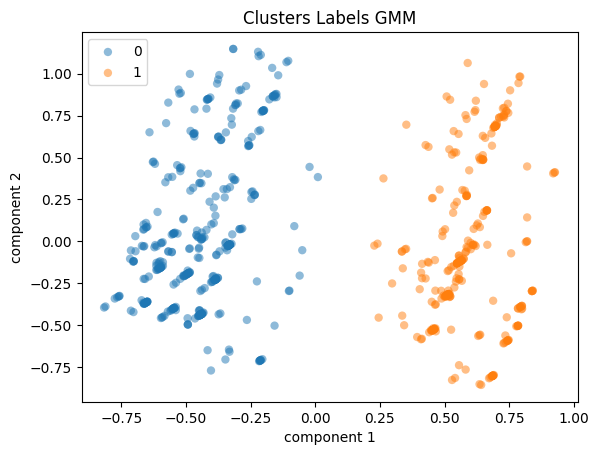

[0.1085044 0.3856305 0.5058651]
[[-1.21654057e-01 -1.12176107e-01  4.39585802e-02  2.46592992e-02
   7.36380746e-01 -4.39090444e-01 -2.13016595e-01 -5.43875543e-03
  -5.34592744e-03  9.55252692e-04 -3.43829179e-04]
 [ 5.97624580e-01 -3.47409733e-02 -2.67604064e-02 -1.74015442e-02
  -8.79594010e-02 -2.35787408e-02  7.93771080e-02  2.19208144e-03
   2.10499385e-03  2.03500220e-03 -6.91712021e-04]
 [-4.29486563e-01  5.05446605e-02  1.09711651e-02  7.97628399e-03
  -9.08952254e-02  1.12156237e-01 -1.48201490e-02 -5.04491354e-04
  -4.58013775e-04 -1.75621529e-03  6.01053973e-04]]
For k = 3
Silhouette score is 0.2604722535352527
Homogeinity score is 0.03541006536867788


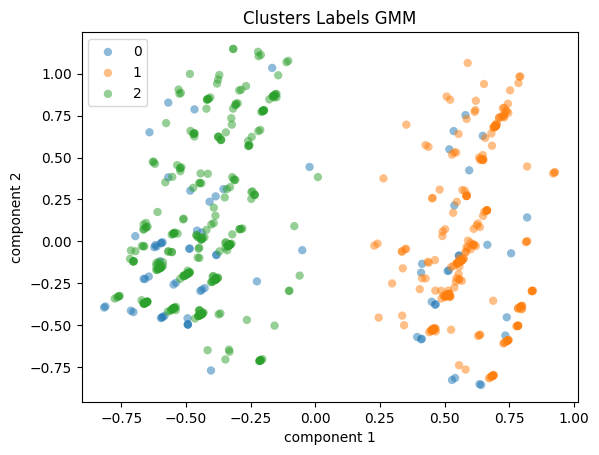

[0.1085044  0.46923972 0.3856305  0.03662538]
[[-1.21654057e-01 -1.12176107e-01  4.39585802e-02  2.46592992e-02
   7.36380746e-01 -4.39090444e-01 -2.13016595e-01 -5.43875543e-03
  -5.34592744e-03  9.55252692e-04 -3.43829179e-04]
 [-4.41901230e-01  8.95478671e-02 -1.06906532e-02 -2.24774800e-03
  -1.13921558e-01  7.18960376e-02 -1.37195893e-02 -5.46075345e-03
  -5.00924430e-03 -5.41467589e-03  1.80243154e-04]
 [ 5.97624580e-01 -3.47409733e-02 -2.67604064e-02 -1.74015442e-02
  -8.79594010e-02 -2.35787408e-02  7.93771080e-02  2.19208144e-03
   2.10499385e-03  2.03500220e-03 -6.91712021e-04]
 [-2.70431434e-01 -4.49159461e-01  2.88499625e-01  1.38965281e-01
   2.04115212e-01  6.27964787e-01 -2.89203795e-02  6.29945081e-02
   5.78517728e-02  4.51155164e-02  5.99242866e-03]]
For k = 4
Silhouette score is 0.21597354703588223
Homogeinity score is 0.03544565972654147


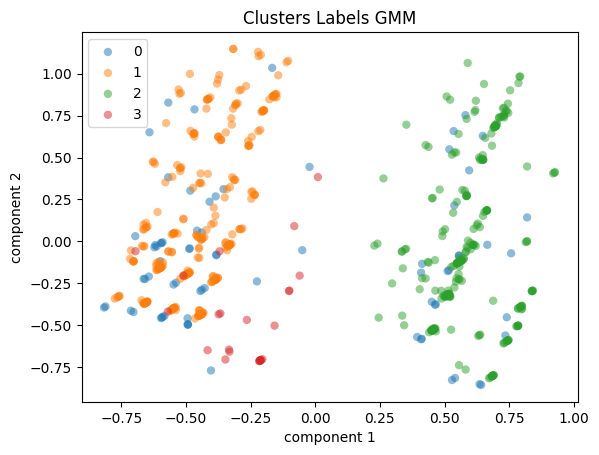

[0.08944282 0.34897361 0.22580645 0.20087977 0.13489736]
[[-2.35514661e-01 -5.53486356e-02 -2.99585998e-02 -9.99665646e-03
   6.65696763e-01 -5.44228176e-01 -2.18945099e-01 -1.82944489e-02
  -1.20558396e-02  7.18787930e-03 -3.47112712e-03]
 [-4.83392052e-01 -1.51387229e-01 -1.28203911e-01  1.04841245e-02
  -1.42679180e-01  4.45038383e-02 -2.62980514e-03 -6.05320864e-03
  -1.78218660e-03 -5.66837111e-03  2.13936239e-03]
 [ 9.94459943e-02  7.00464514e-01  2.86715510e-01 -7.10925596e-02
  -7.36159811e-02  2.74088270e-02 -3.33514455e-03  4.18581085e-03
   2.39018676e-03  4.10007316e-06 -2.58767536e-04]
 [ 5.12645487e-01 -2.01249378e-01 -2.52484359e-01 -1.83337973e-02
  -2.18417960e-01 -2.01075527e-01  6.03432576e-02  1.32558685e-02
   2.61353100e-03  6.00082181e-03 -2.02715012e-03]
 [ 4.76810736e-01 -4.44499381e-01  2.47567109e-01  1.25810422e-01
   3.76198522e-01  4.99265141e-01  6.76970721e-02  1.04300203e-03
   4.71113172e-03  9.55083564e-04  2.18915992e-04]]
For k = 5
Silhouette score 

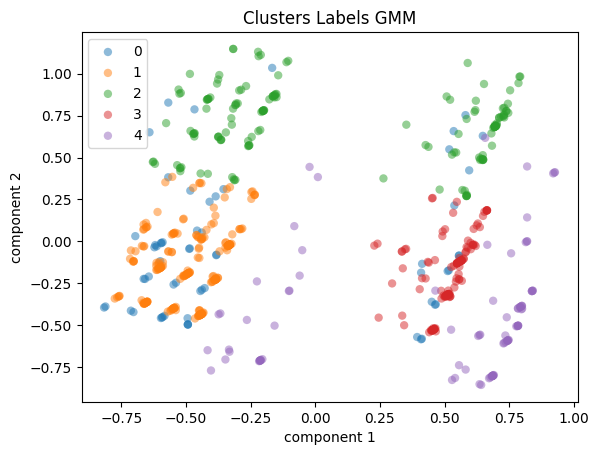

[0.03457101 0.12463343 0.08064522 0.30058651 0.13929619 0.32026765]
[[-3.01681902e-01 -5.57677168e-01  2.91654513e-01  4.61030960e-02
   2.73444850e-01  5.26966385e-01 -7.42241090e-02  1.95681926e-02
   3.01802846e-02 -2.44383291e-02  3.85271469e-02]
 [ 6.60934219e-01  5.82203032e-01  3.17177060e-01 -1.23752295e-01
   2.31224966e-02 -8.78147942e-02  3.42920918e-02  2.69035968e-03
   1.96489346e-03 -6.97319967e-03  4.77584447e-03]
 [-4.23283578e-01  1.00922776e-01 -3.80194145e-01  6.18729129e-01
   5.06833651e-02  3.28959132e-02  4.82461351e-04  3.88811185e-03
   1.14811668e-03 -1.67452334e-02  1.69025011e-02]
 [ 5.66021933e-01 -3.09228832e-01 -1.39809781e-01  2.92949349e-02
  -2.60160720e-02 -5.95714492e-02  6.13018989e-02 -7.87081666e-04
   5.66117419e-04  3.13154545e-03 -1.99906489e-03]
 [-3.30156781e-01  7.24846415e-01  3.27827723e-01 -3.00214242e-02
   3.73867635e-02  1.25945422e-01 -5.65095001e-02  1.25823084e-02
   1.67476995e-03  6.23304206e-03 -4.09548878e-03]
 [-5.05696516e-01

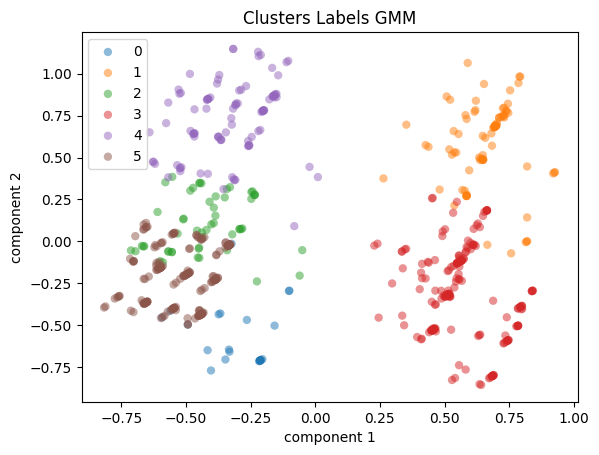

[0.32045225 0.12170088 0.21847507 0.0835629  0.05573329 0.08277355
 0.11730205]
[[-5.05602065e-01 -2.17096464e-01 -7.00706722e-02 -1.26880571e-01
  -4.37015317e-02 -2.97175979e-02 -3.86754933e-02 -8.88119848e-03
  -5.59065517e-03  3.82804827e-03 -6.54590300e-03]
 [ 6.57862803e-01  5.95366480e-01  3.04165056e-01 -1.23696106e-01
  -2.16498381e-03 -9.01629485e-02  4.06058134e-02 -1.18428758e-03
   1.57355770e-04 -5.29916575e-03  2.52212646e-03]
 [ 5.08662432e-01 -2.09773006e-01 -2.43131136e-01 -1.64707172e-02
  -1.56582458e-01 -2.44436477e-01  3.43634287e-02  7.11731406e-03
   2.86970571e-03  3.24605105e-03 -2.46784317e-03]
 [-3.90805824e-01  6.39600396e-01  4.04332590e-01 -2.98363821e-01
   7.10291829e-02  8.16085371e-02  2.25908152e-02  1.49366189e-02
  -1.69848927e-02 -1.52026542e-03 -2.51148727e-03]
 [-2.39223512e-01  8.52658805e-01  2.13121255e-01  3.72313882e-01
  -1.30545138e-02  1.92421292e-01 -1.75107418e-01  9.05240677e-03
   2.96518663e-02  1.78578519e-02 -6.47043862e-03]
 [-4.

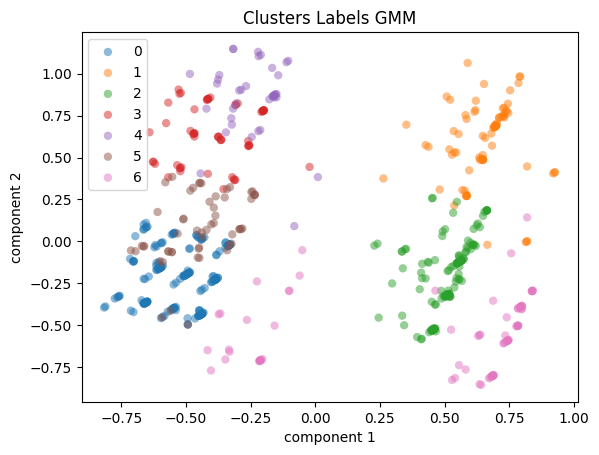

In [313]:
for k in range(2, 8):
    #Applying sklearn GMM function
    gm  = GaussianMixture(n_components=k).fit(principalComponents)
    print(gm.weights_)
    print(gm.means_)
    gm_predicts = gm.predict(principalComponents)
    silhouette_gm_score = silhouette_score(principalComponents, gm_predicts)
    homogeneity_gm_score = homogeneity_score(y_os.to_numpy(), gm_predicts)
    print("For k =", k)
    print("Silhouette score is {}".format(silhouette_gm_score))
    homogeneity = homogeneity_score(y_os.to_numpy(), kmeans.labels_)
    print("Homogeinity score is {}".format(homogeneity_gm_score))
    #Visualize the results sklearn
    plot_samples(principalComponents, gm_predicts, 'Clusters Labels GMM')

---
# Classificação
* Divisão da base:
  * Holdout (Treinamento 70% e Teste 30%)
  * Cross-Validation (k=10)
* Métricas:
  * Matrix de confusão
  * Acurácia
  * F1 Score

In [314]:
x_use = x_zcore # ou x_minmax ou x_zscore
y_use = y_os

# Separação de conjunto de treinamento (70%) e teste (30%)
x_train, x_test, y_train, y_test = train_test_split(x_use, y_use, test_size=0.3, random_state=0)
print(x_train.shape)
print(x_test.shape)

(477, 11)
(205, 11)


### Árvore de Decisão (Decision Tree)

* Holdout

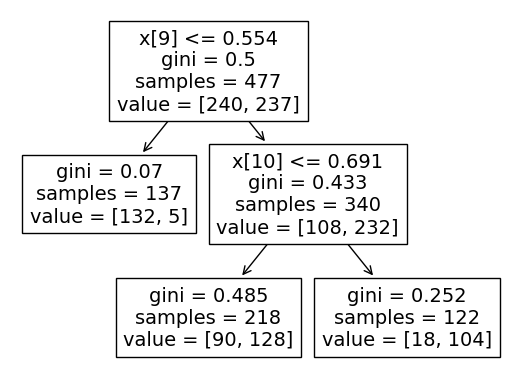

[1 0 1 0 1 1 1 1 1 0 1 1 0 0 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 0 1 0 1 1
 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 0 1 0 1 1 1 1 1 0 1 0 1 1 1 1 1 1 0 0 1 1
 0 1 0 0 0 1 0 0 1 1 1 1 1 0 1 0 0 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 0
 1 1 1 1 1 0 0 1 1 1 0 1 1 0 1 1 0 1 0 1 0 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1
 1 0 0 1 1 1 1 1 1 1 0 1 0 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 0 0 1 1 1 1 1 1
 1 1 1 1 1 0 1 1 0 0 1 0 0 0 1 0 0 1 0 1]
accuracy_score = 0.7609756097560976
f1_score = 0.8063241106719368


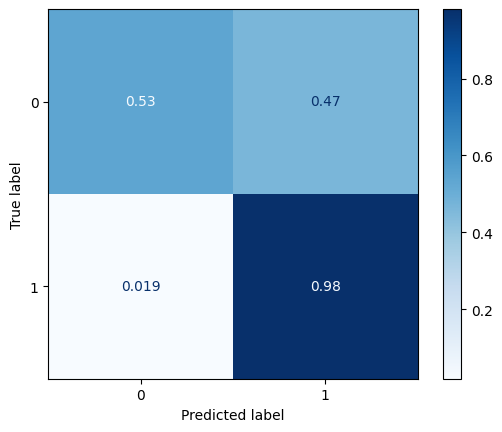

In [315]:
# Construindo a Árvore de decisão
clf = DecisionTreeClassifier(max_leaf_nodes=3)
clf.fit(x_train, y_train)
tree.plot_tree(clf)
plt.show()

predictions = clf.predict(x_test)
print(predictions)

# Métricas
accuracy = accuracy_score(y_test, predictions)
f1_score = f1_score(y_test, predictions)
confusion_matrix = confusion_matrix(y_test, predictions, normalize='true')
print('accuracy_score =', accuracy)
print('f1_score =', f1_score)
ConfusionMatrixDisplay(confusion_matrix = confusion_matrix).plot(cmap='Blues')
plt.show()

* Cross-Validation

[0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 0 0 0 1 0 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1
 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 0 1 0
 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1
 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1
 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1
 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 0 0 1 1 1 1 1 1 1 0 0
 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 0 0 0 0 1 1
 1 1 1 1 1 1 0 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 0 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1
 0 1 0 1 1 0 0 1 1 1 1 1 1 1 1 0 1 0 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 

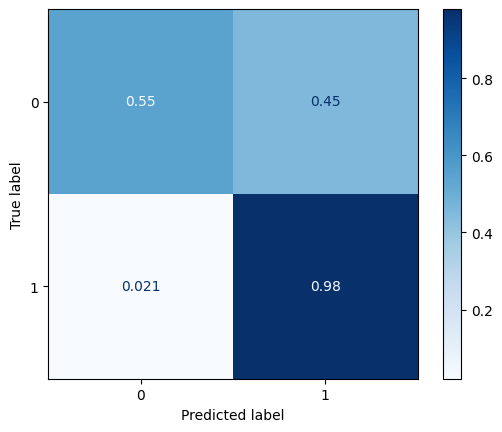

In [316]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Validação-cruzada
clf = DecisionTreeClassifier(max_leaf_nodes=3)
result = cross_validate(estimator=clf,
                        X= x_use,
                        y= y_use,
                        cv = 10,
                        scoring=['accuracy', 'precision', 'recall', 'f1'],
                        return_estimator=True)
# tree.plot_tree(clf)
# plt.show()

# Predições da validação-cruzada
predictions = cross_val_predict(estimator=clf,
                        X= x_use,
                        y= y_use,
                        cv = 10)
print(predictions)

# Métricas
accuracy = result['test_accuracy'].mean()
f1_score = result['test_f1'].mean()
confusion_matrix = confusion_matrix(y_use, predictions, normalize='true')
print('accuracy_score =', accuracy)
print('f1_score =', f1_score)
ConfusionMatrixDisplay(confusion_matrix = confusion_matrix).plot(cmap='Blues')
plt.show()

### KNN (K-Mearest Neighbors)
* Encontrar o parâmetro k com melhor resultado

* Holdout

Best K: 9
Best Accuracy: 0.7804878048780488
Acurracy K-NN: 78.05%
F1 Score K-NN: 78.47%


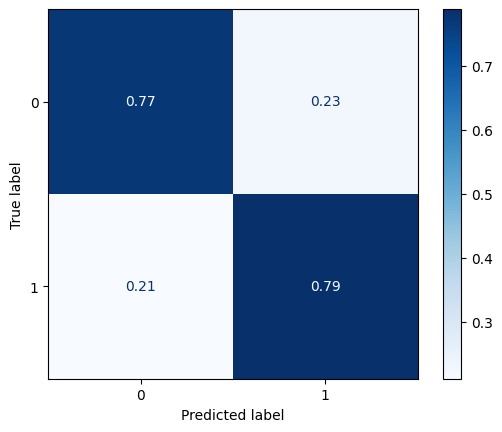

In [317]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

best_k = 0
best_accuracy = 0
for k in range(1, 100):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train, y_train)
    y_hat_test = knn.predict(x_test)
    accuracy = accuracy_score(y_test, y_hat_test)
    if accuracy > best_accuracy:
        best_k = k
        best_accuracy = accuracy

print(f'Best K: {best_k}\nBest Accuracy: {best_accuracy}')

# TESTS USING knn classifier from sk-learn
knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(x_train, y_train)
y_hat_test = knn.predict(x_test)

# Get test accuracy and F1 score
accuracy = accuracy_score(y_test, y_hat_test)
f1_score = f1_score(y_test, y_hat_test)
print("Acurracy K-NN: {:.2f}%".format(accuracy * 100))
print("F1 Score K-NN: {:.2f}%".format(f1_score * 100))

# Get test confusion matrix 
confusion_matrix = confusion_matrix(y_test, y_hat_test, normalize='true')
ConfusionMatrixDisplay(confusion_matrix = confusion_matrix).plot(cmap='Blues')
plt.show()

* Cross-Validation

Best K: 3
Best Accuracy: 0.7639599317988065
[0 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 0 0 0 0 0 1 1 1 0 0 1 1 0 1 1 1 1 0 1 1 1
 1 0 1 1 1 1 0 0 1 1 1 1 1 1 1 0 0 0 1 0 0 1 0 1 1 1 1 0 1 1 0 1 1 0 1 1 1
 0 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 0 1 0 1 1 0 0 1 1 0 1 1 0 1
 0 1 1 1 1 1 1 1 1 1 0 1 0 1 0 1 1 0 1 1 1 1 0 1 1 0 1 0 1 1 1 1 1 1 0 1 0
 0 1 1 1 1 0 1 0 0 1 1 0 1 1 1 1 0 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1
 1 1 1 1 0 1 0 1 1 1 1 0 1 1 1 0 1 1 1 0 1 0 1 0 0 1 0 1 1 1 1 1 1 0 1 1 1
 1 1 1 1 1 1 0 0 1 1 1 1 0 1 1 1 0 1 0 1 1 1 0 1 0 0 1 0 1 0 1 0 0 1 1 1 1
 1 1 1 1 1 1 1 0 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 0 1 1 1 1 1 0
 0 1 0 1 1 1 0 1 1 0 0 1 0 1 1 1 0 1 0 0 1 1 1 0 1 0 0 0 0 0 1 1 1 1 0 0 1
 1 0 0 0 1 1 0 1 1 0 1 1 1 1 1 1 0 1 0 1 0 1 1 0 0 1 0 1 0 1 0 0 0 0 0 1 1
 1 1 0 1 1 1 0 0 0 1 1 0 1 1 1 1 1 1 0 0 1 1 1 0 0 1 1 0 0 1 0 1 0 1 0 1 1
 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 0 0 1 1 0 1 1 1 1
 0 1 0 0 0 0 0 1 1 1 1 1 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1

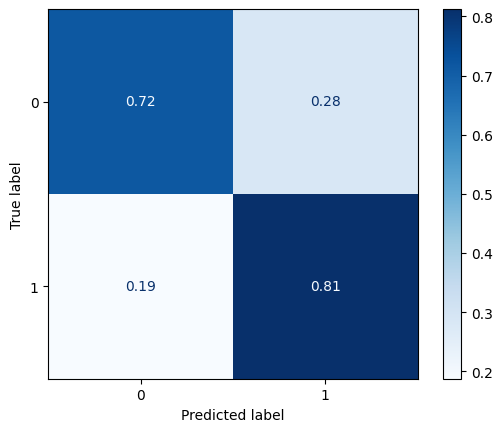

In [318]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


best_k = 0
best_accuracy = 0
for k in range(1, 50):
    clf = KNeighborsClassifier(n_neighbors=k)
    result = cross_validate(estimator=clf,
                        X= x_use,
                        y= y_use,
                        cv = 10,
                        scoring=['accuracy', 'precision', 'recall', 'f1'],
                        return_estimator=True)
    accuracy = result['test_accuracy'].mean()
    if accuracy > best_accuracy:
        best_k = k
        best_accuracy = accuracy

print(f'Best K: {best_k}\nBest Accuracy: {best_accuracy}')

# Validação-cruzada
clf = KNeighborsClassifier(n_neighbors=best_k)
result = cross_validate(estimator=clf,
                        X= x_use,
                        y= y_use,
                        cv = 10,
                        scoring=['accuracy', 'precision', 'recall', 'f1'],
                        return_estimator=True)

# Predições da validação-cruzada
predictions = cross_val_predict(estimator=clf,
                        X= x_use,
                        y= y_use,
                        cv = 10)
print(predictions)

# Métricas
accuracy = result['test_accuracy'].mean()
f1_score = result['test_f1'].mean()
confusion_matrix = confusion_matrix(y_use, predictions, normalize='true')
print('accuracy_score =', accuracy)
print('f1_score =', f1_score)
ConfusionMatrixDisplay(confusion_matrix = confusion_matrix).plot(cmap='Blues')
plt.show()

### SVM (Support Vectors Machine)

* Holdout

[[ 2.53239876  0.8601139  -0.74578167 ...  0.29351741  0.55617063
  -1.19340457]
 [ 2.53239876 -1.16263672  1.34301956 ...  0.29351741  0.55617063
   0.06261691]
 [-0.39488252  0.8601139   2.38742018 ...  0.29351741  0.55617063
   1.31863838]
 ...
 [-0.39488252  0.8601139   0.29861894 ...  0.29351741  0.55617063
   0.06261691]
 [-0.39488252  0.8601139  -0.74578167 ...  0.29351741  0.55617063
  -1.19340457]
 [ 2.53239876 -1.16263672  0.29861894 ...  0.29351741  0.55617063
  -1.19340457]]
[  0   2  15  16  18  19  23  25  26  29  30  31  37  38  46  48  53  55
  57  58  61  63  64  68  70  78  79  81  90  93  94  95  99 101 103 105
 106 107 115 130 132 133 142 143 147 160 163 168 169 171 172 184 186 188
 191 192 194 195 196 213 217 223 227 228 232 236 247 248 249 251 256 257
 258 259 261 267 269 271 275 279 283 284 289 302 307 314 318 328 329 330
 334 340 347 355 359 362 365 368 369 375 381 397 398 406 407 408 413 417
 418 424 429 430 436 438 440 443 446 450 459 460 468 469 470   7   9  

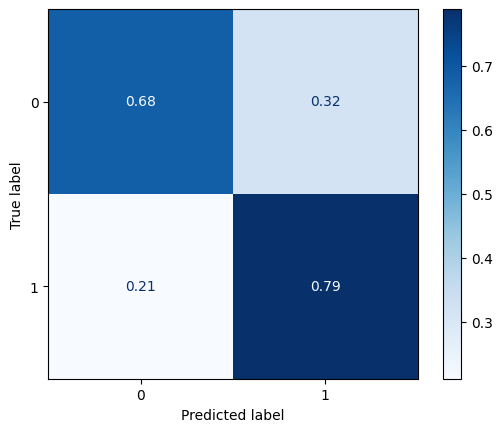

In [321]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix

 # TESTS USING SVM classifier from sk-learn    
svm = SVC(kernel='linear') # poly, rbf, linear
# training using train dataset
svm.fit(x_train, y_train)
# get support vectors
print(svm.support_vectors_)
# get indices of support vectors
print(svm.support_)
# get number of support vectors for each class
print("Qtd Support vectors: ")
print(svm.n_support_)
# predict using test dataset
y_hat_test = svm.predict(x_test)

# Get test accuracy score
accuracy = accuracy_score(y_test, y_hat_test)*100
f1_score = f1_score(y_test, y_hat_test)*100
print("Acurracy SVM from sk-learn: {:.2f}%".format(accuracy))
print("F1 Score SVM from sk-learn: {:.2f}%".format(f1_score))

# Get test confusion matrix 
confusion_matrix = confusion_matrix(y_test, y_hat_test, normalize='true')
ConfusionMatrixDisplay(confusion_matrix = confusion_matrix).plot(cmap='Blues')
plt.show()

* Cross-Validation

[0 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 0 0 0 1 0 1 1 1 0 1 1 1 0 1 1 0 0 1 1 1 1
 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 0 0 0 1 0 1 1 0 1 1 1 1 1 0 1 0 1 1 1 1 1 1
 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 0 1 0 0 0 1 1 1 1 1 1 1
 0 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 0 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 0 1 0
 0 1 1 1 1 0 1 0 1 1 1 0 1 0 1 1 0 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 0 1 1 1
 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 0 0 1 1 1 1 0 1 0 1 0 1 1 1
 0 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 1 1 0 0 1 0 0 1 0 0 1 1 1 1
 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 0 1 1 1 1 0 0
 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 0 1 0 0 0 0 0 1 1 1 1 0 0 0
 1 0 0 0 1 1 1 1 1 1 1 1 1 0 1 1 0 1 0 1 1 1 1 0 1 1 1 1 0 1 1 0 0 0 0 1 1
 1 1 0 1 1 1 0 0 0 1 1 0 1 0 1 1 1 1 0 1 1 1 1 0 0 1 1 1 0 1 0 1 0 1 0 1 1
 1 1 1 1 1 0 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 0 1 0 1 0 1 1 1 0 1 1 0 1 1 1 0
 0 1 0 1 1 0 0 1 1 1 1 1 1 1 1 0 1 0 1 0 1 1 1 1 1 1 1 1 0 1 0 1 1 1 0 1 1
 1 1 0 1 1 1 1 0 1 1 1 1 

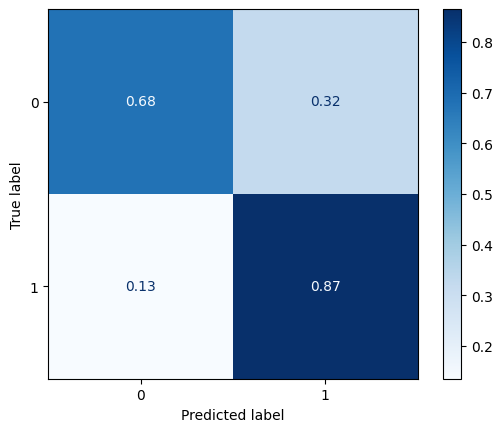

In [322]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Validação-cruzada
clf = SVC(kernel='linear') # poly, rbf, linear
result = cross_validate(estimator=clf,
                        X= x_use,
                        y= y_use,
                        cv = 10,
                        scoring=['accuracy', 'precision', 'recall', 'f1'],
                        return_estimator=True)
# tree.plot_tree(clf)
# plt.show()

# Predições da validação-cruzada
predictions = cross_val_predict(estimator=clf,
                        X= x_use,
                        y= y_use,
                        cv = 10)
print(predictions)

# Métricas
accuracy = result['test_accuracy'].mean()
f1_score = result['test_f1'].mean()
confusion_matrix = confusion_matrix(y_use, predictions, normalize='true')
print('accuracy_score =', accuracy)
print('f1_score =', f1_score)
ConfusionMatrixDisplay(confusion_matrix = confusion_matrix).plot(cmap='Blues')
plt.show()

### Rede Neural MLP (Multilayer Perceptron)
* Arquitetura da rede:
  * Número de neurônios
  * Camadas escondidas
  * Tipo de função de ativação

### Comparação final dos classificadores